# Formation RNAseq CEA - juin 2024

*Enseignantes: Sandrine Caburet et Claire Vandiedonck*

Session IFB : 5 CPU + 21 GB de RAM

# Part 07b:  Introduction to R - part B :
## *Graphics and stats with R*

    I. Some basic plotting
    II. Statistics
    III. Practicals
        Exercice 1 - représentation graphique de données qualitatives
        Exercice 2 - représentation graphique de la distribution d'une variable quantitative continue
        Exercice 3 facultatif - lois de probabilité
        Exercice 4 facultatif - représentation graphique de données quantitatives
        Exercice 5 - tests de comparaison de moyennes, impact de la différence entre les moyennes et de la variance, tests multiples
        Exercice 6 - un exemple d'analyse statistique de données

___
---

## **0 - Initializing the session**
---

### 0.1 - Setting up this R session on IFB core cluster

<em>loaded JupyterLab</em> : Version 3.5.0

In [ ]:
## Code cell 1 ##

session_parameters <- function(){
    
    jupytersession <- c(system('echo "=== Cell launched on $(date) ==="', intern = TRUE),
                        system('squeue -hu $USER', intern = TRUE))
    
    jobid <- system("squeue -hu $USER | awk '/jupyter/ {print $1}'", intern = TRUE)
    jupytersession <- c(jupytersession,
                        "=== Current IFB session size: Medium (5CPU, 21 GB) ===",
                        system(paste("sacct --format=JobID,AllocCPUS,NODELIST -j", jobid), intern = TRUE))
    print(jupytersession[1:6])
    
    return(invisible(NULL))
}

session_parameters()

In [ ]:
## Code cell 2 ##   

cat("Voici mon environnement de travail avec les paquets de R chargés:\n")
sessionInfo()

---

### 0.2 - Parameters to be set or modified by the user


- Using a full path with a `/` at the end, **define the folder** of the project as  `gohome` variable, and the folder where you work as the `myfolder` variable:

In [ ]:
## Code cell 3 ##


gohome <- "/shared/projects/2413_rnaseq_cea/"
gohome

# In a Jupyter Hub and a jupyter notebook in R, by default the working directory is where the notebook is opened
getwd()
myfolder <- getwd()
myfolder


- With a `/` at the end, define the path to the Rintro folder folder where the input data and the results of this notebook will be stored:

In [ ]:
## Code cell 4 ##

# storing the path to this folder in a variable
rintrofolder <- paste0(myfolder,"/Results/Rintro/", sep = "")
rintrofolder

# listing the content of the folder
print(system(paste("ls -hlt", rintrofolder), intern = TRUE) )

- Last, we specify the size of the graphical outputs that will be used for all the plots in the notebook.    
This setting could be modified at will for each plot. 

In [ ]:
## Code cell 5 ##

options(repr.plot.width=10, repr.plot.height=10)

### 0.3 - Loading data from the previous session

In [ ]:
## Code cell 6 ##

rdata <- paste0(rintrofolder,"myDataf.RData")
rdata
load(rdata,verbose = T)

We can now list all the object we have currently in our session: 

In [ ]:
## Code cell 7 ##

ls() 

**Great!!**. All is set now to play with "R base" to perform statistics and plot some graphics.

___
---

## **I - Some basic plots**
---

R is a fanstatic tool to draw nice graphs: https://r-graph-gallery.com/ and https://www.data-to-viz.com/. A great package **ggplot2** allows to draw the nicest plots.

We could spend several sessions on the topic but let's have a quick view of what can be done with **R base** commands on our dataframe.

#### **a. scatter plot with the function `plot()`**

In [ ]:
## Code cell n°8 ##

plot(myDataf$weight ~ myDataf$size)  

#### **b. Representation of quantitative data distribution:** 

- as a boxplot with `boxplot()`:

In [ ]:
## Code cell n°9 ##

boxplot(myDataf$weight)

or using `~ ` to display boxplots on the same plot depending on a categorical variable:

In [ ]:
## Code cell n°10 ##

boxplot(myDataf$weight ~ myDataf$sex) 

- as a histogram with `hist()`:

In [ ]:
## Code cell n°11 ##

a <- rnorm(1000) # to sample 1000 values from a normal distribution of mean 0 and standard deviation 1
hist(a, breaks = 20) # the argument breaks is used to specify the number of intervals

- **customize graphs**

<div class="alert alert-block alert-info"><b><u>Graphs have three-level functions:</u></b>

1. <b>primary graph functions</b> like `plot()`, `boxplot` and `hist()` to display the most principal graphs in R

2. <b>secondary graph functions</b> to complement an existing plot like `points()`, `lines()`, `legend()` or `title()` to display the most principal graphs in R. In a notebook, use them in the same cell.

3. <b>graphical parameters</b> to modify the plots display:
    - either as options of the primary and secondary functions
    - or permanetly with the `par()` function before plotting the graph.</div>


Below is an example using primary and secondary functions:

In [ ]:
## Code cell n°12 ##

plot(myDataf$weight ~ myDataf$size,
     main = "Weight ~Size", 
     xlim = c(-3,3),
     ylim = c(0,200),
     type = "n",
     xlab = "Size",
     ylab = "Weight")
points(myDataf$weight[1:2] ~ myDataf$size[1:2],
       pch = 6,
       col = "blue")
points(myDataf[3:6,"weight"] ~ myDataf$size[3:6],
       type = "b",
       pch = 23,
       col = "magenta",
       bg = "cyan",
       cex = 2)
points(seq(0, 2.5, 0.5),
       c(1, 10, 25, 50, 125, 150),
       type = "l") 
lines(-seq(0, 2.5, 0.5),
      c(1, 10, 25, 50, 125, 150),
      lty = "dotdash",
      col = "blue",
      lwd = 3) 
abline(0, -50,
       lty = 3,
       col = "red")
abline(v = 0,
       lty = 2,
       col = "green")

mtext("overlap of unrelated graphs",
      side = 1)
mtext("other text",
      side = 1,
      line = 2)
text(-1, 150,
     "some text here")
axis(side = 4,
     labels = c(0, 20, 80, 160),
     at = c(0, 20, 80, 160),
     tick = TRUE)
legend("topright",
       c("blue triangles", "diamonds", "red line"),
       pch = c(6, 23, NA),
       col = c("blue", "magenta", "red"),
       pt.bg = c("transparent", "cyan", "transparent"),
       lty = c(0,0,3))

- **saving graphs**

Save figures in different formats with the appropriate function (by default in the working directory)
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">function</th>
    <th class="tg-0pky">extension file</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">bmp()</td>
    <td class="tg-0pky">.bmp</td>
  </tr>
  <tr>
    <td class="tg-0pky">jpeg()</td>
    <td class="tg-0pky">.jpeg</td>
  </tr>
  <tr>
    <td class="tg-0pky">tiff()</td>
    <td class="tg-0pky">.tiff</td>
  </tr>
  <tr>
    <td class="tg-0pky">png()</td>
    <td class="tg-0pky">.png</td>
  </tr>
  <tr>
    <td class="tg-0pky">postscript()</td>
    <td class="tg-0pky">.eps</td>
  </tr>
  <tr>
    <td class="tg-0pky">pdf()</td>
    <td class="tg-0pky">.pdf</td>
  </tr>
</tbody>
</table>

***Three steps***
1. Type the function with the name of the saved file as an argument with the correct extension. Other arguments like « width » and « height » to specify dimensions.
2. Do your plot -> it is directed to the file and not displayed in the graphical window within R
3. Close the graph by typing the `dev.off()` function

> Specific case for `pdf()`: you may save each figure at a time or all several (all) figures generated with all the command lines entered between `pdf()` and `dev.off()`.

---
---
## **II - Statistics with R**
___

R is a dedicated language to perform statistics including descriptive statistics and statistical tests.

- for **descriptive statistics** you may use `summary()` function:

In [ ]:
### Code cell n°13 ##

summary(myDataf)

- for **statistical tests**

Let's start with a t test with the function `t.test` that compares means of quantitative variable between 2 groups.

In [ ]:
## Code cell n°14 ##

t.test(myDataf$weight ~ myDataf$sex) 

<div class="alert alert-block alert-info"><b><u>To interpret the test, look at the p-value</u></b>  If it is below the alpha risk, then you can reject the null hypothesis</div>
    
In the example above, it is not significant at 5%: the null hypothesis could not be rejected. 

Let's now perform a Chi square test with `chisq.test()` that compares distributions of qualitative variables.

For the example, lets consider a contingency table with counts of genotypes obtained in 2 groups, one of patients and one of controls.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">genotype</th>
    <th class="tg-0pky">cases</th>
    <th class="tg-0pky">controls</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">0/0</td>
    <td class="tg-0pky">188</td>
    <td class="tg-0pky">94</td>
  </tr>
  <tr>
    <td class="tg-0pky">1/0 (or 0/1)<br></td>
    <td class="tg-0pky">133<br></td>
    <td class="tg-0pky">92</td>
  </tr>
  <tr>
    <td class="tg-0pky">1/1<br></td>
    <td class="tg-0pky">24</td>
    <td class="tg-0pky">30</td>
  </tr>
</tbody>
</table>

In [ ]:
## Code cell n°15 ##

cases_controls <- data.frame("genotype" = c("0/0", "1/0 (or 0/1)","1/1"),
                             "cases" = c(188,133,24),
                             "controls" = c(94,92,30))

In [ ]:
## Code cell n°16 ##

cases_controls

We can compute the observed frequencies with the function `proportions`...

In [ ]:
## Code cell n°17 ##

proportions(as.matrix(cases_controls[,2:3]),2)

...and display these proportions in a stacked barplot:

In [ ]:
## Code cell n°18 ##

barplot(proportions(as.matrix(cases_controls[,2:3]),2),
        beside = FALSE,
        legend = cases_controls$genotype)

Let's now test whether these proportions differ between cases and controls with a Chi square test:

In [ ]:
## Code cell n°19 ##

chisq.test(cases_controls[, 2:3]) 

This time the pvalue is belwo 5%, wa can reject the null hypothesis of equal frequencies. 

---
---
## **III - Practicals**
___


### Exercice 1: représentation graphique de données qualitatives
---

Importez dans R le fichier `motorisation.txt` qui est sur la page moodle du cours ou dans le répertoire partagé accessible en lecture dans notre projet dans : `/shared/projects/2413_rnaseq_cea/allData/Example_Data` et sur google drive : https://drive.google.com/file/d/1u1DgGk5HiqWi5IsHz-Sx8INkKbfWvIP9/view?usp=drive_link

L'objectif de cet exercice est d'étudier la distribution des différents types de motorisations de véhicules.

- Importez le fichier dans R avec la fonction `read.table()` sous la forme d'un dataframe que vous appelerez `motorisation`.

Avant de lire ce fichier et de l'assigner dans un objet R, ouvrez le avec un editeur de texte pour voir s'il y a une en-tete, combien il contient de lignes, de colonnes et quel est leur separateur (espace, tabulation, virgule, point virgule, etc...)<br>
Ici `motorisation.txt` est un fichier texte de 22 lignes, avec une seule colonne (donc vous pouvez garder le separateur de champs "espace" par defaut dans la commande read.table), et sans en-tête (donc il faut le specifier avec l'argument "header" sinon votre premiere valeur serait lue comme un nom de colonne par defaut).


*__Tip :__* fonctions recommandées :
    `read.table()`,
    `str()`_

In [1]:
## Code cell n°20 ##


- Toujours verifier ensuite la structure des objets importés et se demander si elle est conforme a ce que vous souhaitez avec la fonction `str()`

In [ ]:
## Code cell n°21 ##


- Renommez la variable `V1` par `type_de_motorisation` en utilisant la fonction `names()`

In [ ]:
## Code cell n°22 ##


- Générez un tableau de contingence avec la fonction `table()` comptant le nombre d'observations de chaque valeur de la variable "type de motorisation". Il s'agit d'un objet R a une seule dimension.

In [ ]:
## Code cell n°23 ##


- Générez un camembert de la répartition des différentes motorisations.

*__Tip :__* fonctions recommandées :
    `pie()`,
    `table()`_

In [ ]:
## Code cell n°24 ##


- Essayez de dessiner le même camembert en choisissant vous-mêmes des couleurs avec l'argument `col()` à partir des palettes de couleurs R (https://web.archive.org/web/20121202022815/http://research.stowers-institute.org/efg/R/Color/Chart/ColorChart.pdf)

In [ ]:
## Code cell n°25 ##


- Générez également un diagramme en bâtons avec les proportions (fréquences relatives) des différentes motorisations colorées comme dans le camembert.

*__Tip :__* fonctions recommandées :
    `table()`,
    `barplot()`_

In [ ]:
## Code cell n°26 ##


- Avec la fonction `par()` que vous appellerez avant les deux commandes de chaque graphique, disposez les deux graphes côte à côte sur un même graphique.

*__Tip :__* fonctions recommandées :
    `par()`avec l’argument `mfrow`

In [ ]:
## Code cell n°27 ##


<div class="alert alert-block alert-danger"><b>Attention:</b> Vous noterez qu’il est préférable de visualiser les donnees qualitatives, comme ici le type de motorisation, au moyen d’un diagramme en bâtons. Cela vous ai rappele en ‘Note’ dans la fenetre d’aide de la fonction pie!</div>


### Exercice 2: représentation graphique de la distribution d’une variable quantitative continue
---

Tirez aléatoirement un ensemble de 100 nombres compatibles avec une distribution normale de moyenne 10 et d’écart type 5.

Sauvegardez-les dans un objet R.

*__Tip :__*
_fonction recommandée : `rnorm()`_

In [ ]:
## Code cell n°28 ##


Tracez la représentation histogramme des valeurs obtenues.

*__Tip :__*
_fonction recommandée : `hist()`_


In [ ]:
## Code cell n°29 ##

Changez le nombre d’intervalles de l’histogramme : environ 5, 50 et 100.

*__Tip :__*_fonction recommandée : `hist()` avec l'argument `breaks`_

In [ ]:
## Code cell n°30 ##

Tracez également une boite à moustache horizontale de ces data.

*__Tip :__*
_fonction recommandée : `boxplot()`_

In [ ]:
## Code cell n°31 ##

Affichez les 3 histogrammes et le boxplot les uns en dessous des autres dans une même fenêtre graphique.

*__Tip :__*
_fonction recommandée : `par()` avec l'argument `mfrow`_

In [ ]:
## Code cell n°32 ##



### Exercice 3 *facultatif* : lois de probabilité
---

<span style="color:blue">  <b>=> Q1: </b> <br>
Si X suit une loi normale de moyenne 10 et d’écart type 5, quelle est la probabilité P(7≤X≤15) ?
Arrondissez à trois décimales.</span>



*__Tip :__*
_fonction recommandée : `pnorm()`, `round()`_

In [ ]:
## Code cell n°33 ##


N'oubliez pas que l'aire totale sous la courbe est égale à 1 car la probabilité d'avoir une valeur entre -Inf et +Inf dans une telle loi est égale à 1.

Il faut calculer d'abord la probabilite que X<15, cad l'aire sous la courbe de la loi de probabilite de la loi normale, puis soustraire la probabilite que x<7!

Alternativement, vous pouviez jouer sur le côté de l'aire sous la courbe affichée.

In [ ]:
## Code cell n°34 ##


<span style="color:blue">  <b>=> Q2: </b> <br>
Si X suit une loi normale de moyenne μ=10 et d’écart type σ=5, quelle est la valeur de k telle que P(X≤k)=0.67 ?
Arrondissez à une décimale.</span>

*__Tip :__*
_fonction recommandée : `qnorm()`, `round()`_

In [ ]:
## Code cell n°35 ##


<span style="color:blue">  <b>=> Q3: </b> <br>
Soit un test de Chi2 à 3 degrés de libertés avec une valeur de la statistique de `Chi2=6.26`. Quelle est la p-value de ce test ?
Arrondissez à quatre décimales.</span>

*__Tip :__*
_fonction recommandée : `pchisq()`, `round()`_

In [ ]:
## Code cell n°36 ##



### Exercice 4 *facultatif* : représentation graphique de données quantitatives
---
Nous allons travailler avec le jeu de données `airquality`.

- **Récupérez le jeu de données `airquality`** disponible sous R avec la fonction `data()` et vérifiez sa structure.

*__Tip :__*_fonctions recommandées : `data()`, 
   `str()`_

In [ ]:
## Code cell n°39 ##


- **Créez les graphes de la figure ci-dessous** avec ce jeu de données.

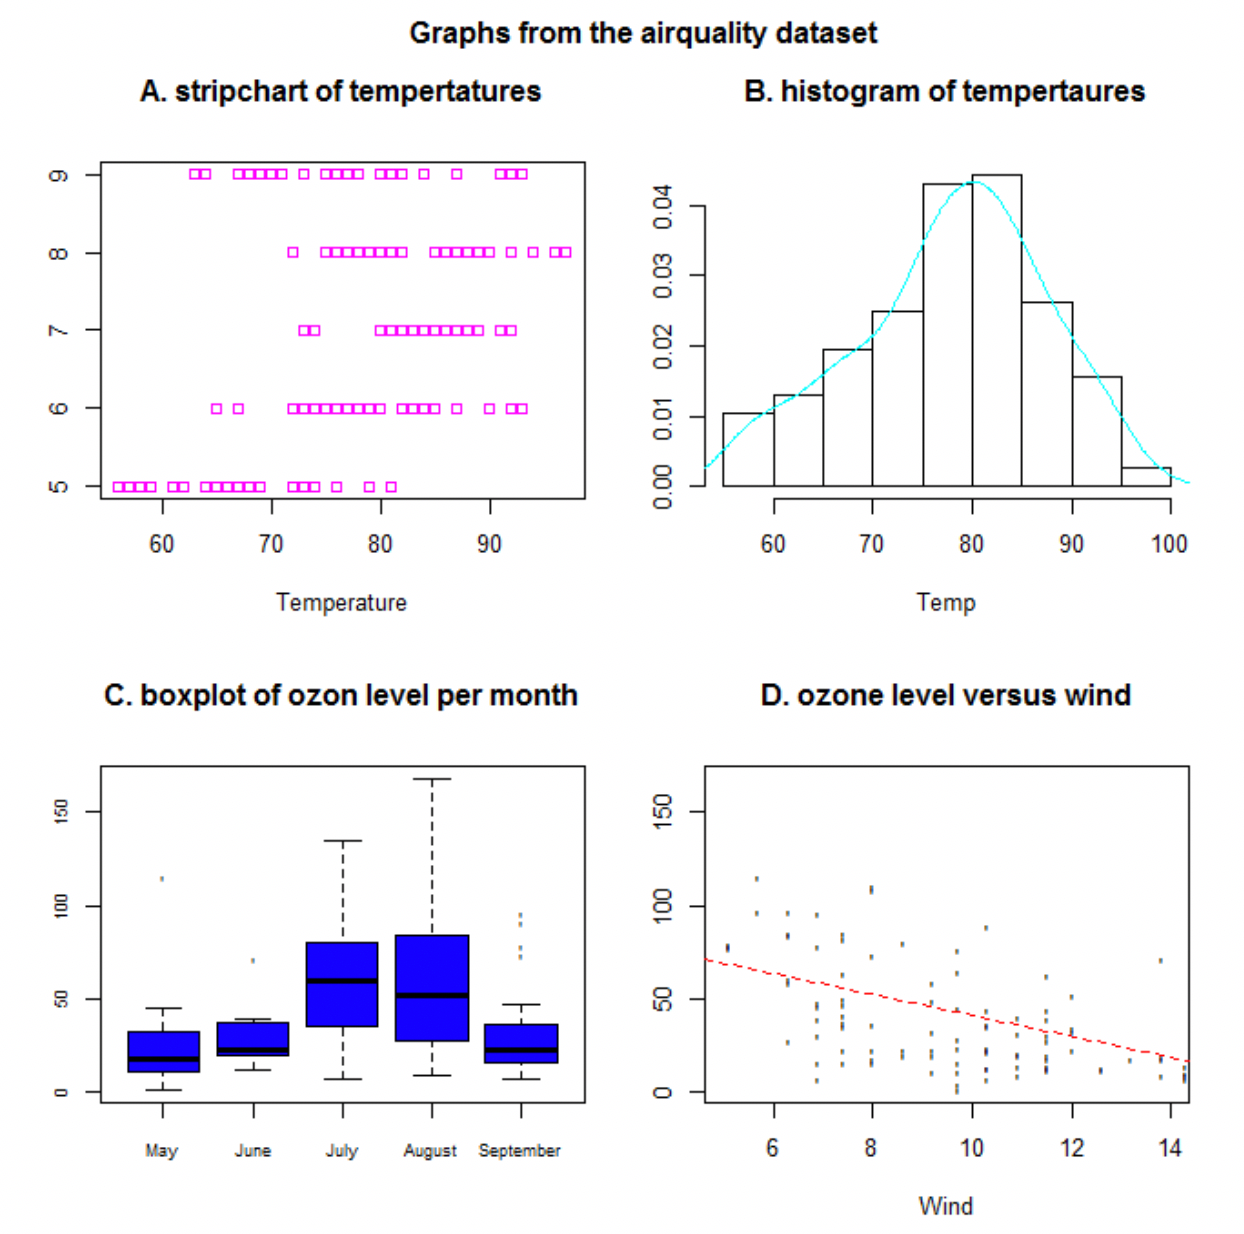

*__Tip :__*
_fonctions recommandées :
    `par()` avec les arguments `mfrow` et `mar`,
    `plot()`,
  `lines()`,
    `boxplot()`,
    `abline()`,
    `lm()`,
    `title()`_

In [ ]:
## Code cell n°40 ##


### Exercice 5 : test de comparaison de moyennes, impact de la différence entre les moyennes et de la variance, tests multiples
---

#### 5.1. Test de comparaison de moyennes

Nous allons d'abord tirer deux échantillons de deux populations présentant des **moyennes différentes et une même variance**.

A titre d'exemple dans ce practical nous prendrons la "taille des humains debout" comme trait d'intérêt.
En France en 2001, les données de l'INSEE indiquaient une taille moyenne de 1.62 pour les femmes et de 1.74 m pour les hommes. Dans l'ensemble de la population, l'écart-type était d'environ 7 cm.

- Générez 2 échantillons `sample1` et `sample2` de taille 100, issus de la population d'hommes et de femmes avec les paramètres indiqués en supposant que la densité de probabilité de la taille suit une loi normale.

*__Tip:__ utiliser la fonction `rnorm()`*

In [ ]:
## Code cell n°41 ##


In [ ]:
## Code cell n°42 ##


- Regardez les valeurs résumées des distributions observées et faites un simple boxplot de ces distributions.

*__Tip:__ utiliser les fonctions `summary()` et `boxplot`*

In [ ]:
## Code cell n°43 ##


In [ ]:
## Code cell n°44 ##


- Testez la différence des moyennes entre les deux populations d'où sont issus ces échantillons avec un test de Student bilatéral

*__Tip:__ utiliser la fonction `t.test()`*

In [ ]:
## Code cell n°45 ##


- Quelle est la valeur de la p-value?

*__Tip:__ utilisez la fonction `str()` pour voir comment extraire cette pvalue du test*

In [ ]:
## Code cell n°46 ##


#### 5.2. Impact de la taille des échantillons, de la différence des moyennes ou de la variance

Nous allons à présent étudier l'impact de la différence entre les moyennes des populations de départ ou celui de la variance sur la puissance de détecter une différence.

- Pour jouer sur ces différents paramètres, on écrit une fonction qui prend comme argument la taille des échantillons, la moyenne et la variance de chacune des populations, et qui renvoie la statistique t et la pvalue du test de Student.

In [ ]:
## Code cell n°47 ##
compute_tv <- function(n1, m1, s1, n2, m2, s2){
    sample1 <- rnorm(n = n1, mean = m1, sd = s1)
    sample2 <- rnorm(n = n2, mean = m2, sd = s2)
    tval <- t.test(sample1, sample2, alternative = "two.sided")$statistic
    pval <- t.test(sample1, sample2, alternative = "two.sided")$p.value
    tv <- list("t" = tval, "p" = pval)
    return(tv)
}

- Faites le test en prenant à présent les **écarts types différents** chez les hommes et les femmes qui sont respectivement de 7.1 cm et 6.5 cm dans la population Française en 2001.

In [ ]:
## Code cell n°48 ##
compute_tv(n1 = 100, m1 = 174, s1 = 7.1, n2 = 100, m2 = 162, s2 = 6.5)

- Refaites le test **en réduisant les effectifs** à 30 pour chaque échantillon.

In [ ]:
## Code cell n°49 ##


<span style="color:blue">**=> Comment a varié la significativité?**</span>

Les paramètres de la distribution de la taille des humains varient aussi entre les populations dans le monde.

- Refaites le test avec ces effectifs de 30, en gardant la même différence entre les moyennes mais **en augmentant la variance** à 25 pour chaque population.

In [ ]:
## Code cell n°50 ##


<span style="color:blue">**=> La différence, même importante entre les moyennes des populations, est-elle encore détectable?**</span>

- Refaites le test avec des populations présentant une **petite différence entre les moyennes**  (3 cm, avec par exemple 160 cm pour les femmes et 163 cm pour les hommes) et **des variances faibles** (3 cm)

In [ ]:
## Code cell n°51 ##


<span style="color:blue">**=> Détectez-vous quand même une différence statistiquement significative?**</span>

<div class="alert alert-block alert-warning"><b>Conclusion:</b>
La puissance du test augmente avec:
    
- la taille des échantillons
- la différence entre les moyennes des populations
- une petite variance </div>

#### 5.3. Effet des tests multiples sur le taux de faux positifs
---

Nous sommes entrés dans l'ère des données massives. Par exemple, dans les jeux de données omiques, on effectue autant de tests que de "features" (e.g., gènes).

Nous n'allons pas générer dans ce tutoriel de multiples features mais nous allons prendre notre trait de la taille et tester, par simulation, l'impact des tests multiples sur les faux positifs.

Nous partons d'un dataframe que nous générons en rassemblant les données des deux échantillons dans un dataframe avec deux colonnes `height` pour la taille et `grp` pour le groupe

*__Tip:__ utilisez la fonction `data.frame()` sur un vecteur concaténant les taille des deux échantillons avec la fonction `c()` et un vecteur répétant les valeurs 1 et 2 100 fois dans le bon ordre avec la fonction `rep()` et son argument `each=`*

In [ ]:
## Code cell n°52 ##
df <- data.frame(height = c(sample1, sample2), grp = rep(c(1,2), each = 100))

Nous affichons les premières, dernières lignes du dataframe et sa structure. Comptez également le nombre d'observations appartenant au groupe 1 ou 2.

*__Tip:__ utilisez les fonctions `head()` , `tail()`, `str()` et `table()`.*

In [ ]:
## Code cell n°53 ##


In [ ]:
## Code cell n°54 ##


In [ ]:
## Code cell n°55 ##


In [ ]:
## Code cell n°56 ##


- Nous allons **simuler 10000 échantillons sous une hypothèse nulle** où le groupe ne modifie pas les moyennes. Pour ce faire, on génére 10000 permutations de Monte-Carlo en tirant au hasard les statuts pour les groupes. Et on récupére les valeurs de tests `tvalues` et `pvalues` .

*Dans la commande ci-dessous, la fonction `for()` sert à  répéter le code 1000 fois. Dans la boucle, on génére un vecteur avec les valeurs permutées pour le groupe et on effectue le test pour récupérer les valeurs p et de statistique* 

In [ ]:
## Code cell n°57 ##
tvalues <- c()
pvalues <- c()

for(i in 1:10000){
    perm_df <- df
    perm_df$grp <- sample(perm_df$grp, size=200)
    tval <- t.test(perm_df$height ~ perm_df$grp, alternative = "two.sided")$statistic
    tvalues <- c(tvalues, tval)
    pval <- t.test(perm_df$height ~ perm_df$grp, alternative = "two.sided")$p.value
    pvalues <- c(pvalues, pval)
}

- Affichez les valeurs résumées et un histogramme des statistiques t contenues dans le vecteur `tvalues`:

In [ ]:
## Code cell n°58 ##


In [ ]:
## Code cell n°59 ##


- Combien de valeurs de statistique sont significatives bien que conformes à H0? 


*__Tip:__ Utilisez la fonction `qnorm()` pour retrouver la valeur seuil d'une loi normale au risque alpha = 5%* 

In [ ]:
## Code cell n°60 ##
qnorm(0.025, 0, 1, lower.tail=FALSE)

In [ ]:
## Code cell n°61 ##
length(which(abs(tvalues)>=1.96))

**=> Ce résultat était-il attendu?**

- Affichez les valeurs résumées et un histogramme des pvalues:

In [ ]:
## Code cell n°62 ##
summary(pvalues)
hist(pvalues)

**=> Quelle est la distribution des pvalues sous HO?**

<div class="alert alert-block alert-warning"><b>Conclusion:</b>
Sous HO:
    
- on obtient environ une proportion alpha de valeurs significatives -> si 10000 tests ont été effectués, cela fait envriron 500 différences significatives ! Il faut donc corriger pour les tests multiples pour éviter un taux de faux positifs trop élevé.
- la distribution des pvalues est une distribution uniforme entre 0 et 1.</div>

### Exercice 6 facultatif : un exemple d'analyse statistique de données
---

Importez dans R le fichier `poisson.txt` disponible dans `/shared/projects/2413_rnaseq_cea/allData/Example_Data` ou sur le google drive : https://drive.google.com/file/d/11TsqA_ZwZ7o8_osKjdXBIMCqUNKY2YRi/view?usp=drive_link.

Il s’agit d’un jeu de données de l’espèce de poisson “grand corégone” du lac Nathalie dans le territoire de la baie James (province du Québec) (*d’après B. Scherrer*). En 1977, Dumont a cherché les relations existantes entre le potentiel reproducteur (nombre d’œufs) de cette espèce de poisson (grand Corégone) et plusieurs caractères morphologiques. L’étude a été menée afin de déterminer une éventuelle relation entre le nombre d’œufs, révélant le potentiel reproducteur des poissons, et les variables morphologiques caractérisant ces poissons.

__1. Statistiques descriptives__

Identifier les variables et le nombre d’observations de l’échantillon.

_Fonctions recommandées :_
`read.table()`, `head()`, `dim()`, `str()`, `names()`

In [ ]:
## Code cell n°63 ##


Calculer la moyenne, la variance et l’écart-type de chaque variable aléatoire.
    
_Fonctions recommandées:_
        `mean()`
        `var()`
        `sd()`
        `apply()`
        `summary()`

In [ ]:
## Code cell n°64 ##


In [ ]:
## Code cell n°65 ##


In [ ]:
## Code cell n°66 ##


---
Réaliser les représentations des distributions de chaque variable aléatoire.

_Fonctions recommandées:_
    `hist()`, `par(mfrow = c(-,-))`, `curve()`, `dnorm()`


Ces variables vous semblent-elles distribuées selon une loi Normale ? Pour le vérifier, superposez sur chaque histogramme les courbes de densité des lois normales correspondantes (les moyennes et les variances sont estimées à partir des données de l’échantillon). Vous pouvez tracer par superposition la loi normale de même moyenne et écart type sur chaque histogramme. Vous pouvez également tracer le qqplot pour comparer la distribution de chaque variable à celle d’une loi normale. Enfin, vous pouvez tester l’hypothèse nulle de la normalité par un test de Shapiro.

_Fonctions recommandées:_
`curve()`, `dnorm()`, `qqplot()`, `qqline()`

In [ ]:
## Code cell n°67 ##


Pour note: vous pouvez rechercher la valeur maximale sur l’axe des y en regardant le max de la densité et l’utiliser comme valeur dans l’argument `ylim`. Pour la distribution normale théorique, la moyenne est aussi le mode donc la valeur Y maximale, il suffit donc de récuperer la valeur Y à cette moyenne donnée par la fonction `dnorm()` :

In [ ]:
## Code cell n°68 ##
dnorm(mean(coregone$oeufs_nombre),mean(coregone$oeufs_nombre),sd(coregone$oeufs_nombre))

Pour les valeurs de la variable avec `max(hist(variable)$density)` regardez la structure de l’histogramme avec `str()` et recuperez le max de la densité:

In [ ]:
## Code cell n°69 ##


On peut aussi representer des qqplot: comparaison de la distribution des données à une distribution connue, ici à celle d’une loi normale

In [ ]:
## Code cell n°70 ##


Pour aller plus loin, on peut tester la normalité de la distribution avec le test de Shapiro :

In [ ]:
## Code cell n°71 ##


In [ ]:
## Code cell n°72 ##


In [ ]:
## Code cell n°73 ##


In [ ]:
## Code cell n°74 ##


In [ ]:
## Code cell n°75 ##


---
__2. Comparaison des potentiels reproducteurs selon l’âge :__

Existe-t-il une différence du nombre d’œufs produits entre les poissons jeunes (âge inférieur à 10 ans) et âgés (âge supérieur ou égal à 10)?

- Créez une nouvelle variable qualitative pour identifier les deux groupes : les individus `jeunes` et les individus `âgés`

_Fonction recommandées:_
`which()` ou `subset()`

In [ ]:
## Code cell n°76 ##


- Représentez la distribution de la variable œufs en fonction de la variable âge.
    
_Fonctions recommandées_
        `boxplot()`, `stripchart()`

In [ ]:
## Code cell n°77##


- Calculez les moyennes dans chaque groupe du nombre d’œufs
    
_Fonctions recommandées:_
        `tapply()`, `mean()`


In [ ]:
## Code cell n°78 ##


- Existe-t-il une différence entre ces moyennes ?
    
_Fonctions recommandées:_
        `t.test()`, `wilcox.test()`

In [ ]:
## Code cell n°79 ##


In [ ]:
## Code cell n°80 ##


- Existe-t-il une relation linéaire entre le poids des gonades et le nombre d’oeufs produits ?
   
_Fonctions recommandées:_
        `plot()`,
        `cor()`,
        `lm()`,
        `cor.test()`


In [ ]:
## Code cell n°81 ##


In [ ]:
## Code cell n°82 ##


In [ ]:
## Code cell n°83 ##


__Conclusion__

Que pouvez-vous conclure quant à lâge des poissons et la production des oeufs?

=> Les poissons âgés ont tendance à pondre plus d’oeufs que les jeunes, ce qui est en relation avec le poids de leurs gonades

*Vous pouvez ensuite tester l’effet d’autres variables sur la variable « oeufs ».*

<div class="alert alert-block alert-success"><b>Success:</b> Well done! You have seen how to draw basic plots and run simple statistics with R base.

</div>


---
___

## Conclusion

---

Now we go on with a first exploratory analysis of counts, before normalisation.  
  
**=> Step 8: Exploratory analysis of counts** 

The jupyter notebook used for the next session will be *Pipe_08-R403_counts-exploratory-analysis-I.ipynb*    
Let's retrieve it in our directory, in order to have a private copy to work on:   

In [ ]:
## Code cell 84 ##   

myfolder <- getwd()

#myfolder <- setwd('/shared/ifbstor1/projects/2413_rnaseq_cea/mylogin') # devrait être inutile
#myfolder

file.copy("/shared/projects/2413_rnaseq_cea/pipeline/Pipe_08-R_counts-exploratory-analysis-I.ipynb", myfolder)



**Save executed notebook**

To end the session, save your executed notebook in your `run_notebooks` folder. **Adjust the name with yours** and reformat as code cell to run it.

---

<div class="alert alert-block alert-success"><b>Success:</b> Well done! You now know all the main functions to create and manipulate basic R objects.<br>
Don't forget to save you notebook and export a copy as an <b>html</b> file as well <br>
- Open "File" in the Menu<br>
- Select "Export Notebook As"<br>
- Export notebook as HTML<br>
- You can then open it in your browser even without being connected to the server! 
</div>

## Useful commands
<div class="alert alert-block alert-info"> 
    
- <kbd>CTRL</kbd>+<kbd>S</kbd> : save notebook<br>    
- <kbd>CTRL</kbd>+<kbd>ENTER</kbd> : Run Cell<br>  
- <kbd>SHIFT</kbd>+<kbd>ENTER</kbd> : Run Cell and Select Next<br>   
- <kbd>ALT</kbd>+<kbd>ENTER</kbd> : Run Cell and Insert Below<br>   
- <kbd>ESC</kbd>+<kbd>y</kbd> : Change to *Code* Cell Type<br>  
- <kbd>ESC</kbd>+<kbd>m</kbd> : Change to *Markdown* Cell Type<br> 
- <kbd>ESC</kbd>+<kbd>r</kbd> : Change to *Raw* Cell Type<br>    
- <kbd>ESC</kbd>+<kbd>a</kbd> : Create Cell Above<br> 
- <kbd>ESC</kbd>+<kbd>b</kbd> : Create Cell Below<br> 

<em>  
To make nice html reports with markdown: <a href="https://dillinger.io/" title="dillinger.io">html visualization tool 1</a> or <a href="https://stackedit.io/app#" title="stackedit.io">html visualization tool 2</a>, <a href="https://www.tablesgenerator.com/markdown_tables" title="tablesgenerator.com">to draw nice tables</a>, and the <a href="https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd" title="Ultimate guide">Ultimate guide</a>. <br>
Further reading on JupyterLab notebooks: <a href="https://jupyterlab.readthedocs.io/en/latest/user/notebook.html" title="Jupyter Lab">Jupyter Lab documentation</a>.<br>   
</em>    
 
</div>

Claire Vandiedonck - 2021-2022   
Sandrine Caburet - 05/2023   
MAJ : 11/06/2024 by @CVandiedonck